[4.526 3.585 3.521 ... 0.923 0.847 0.894]


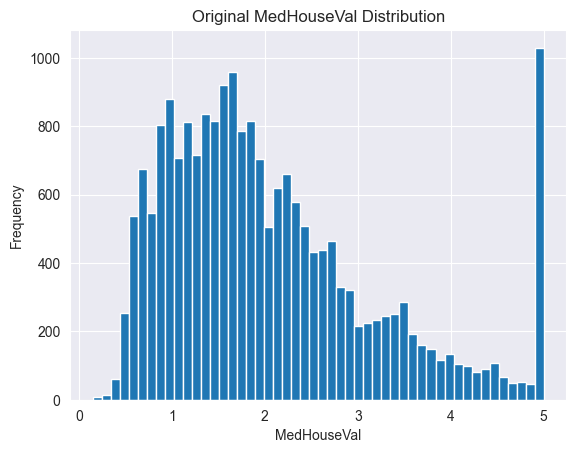

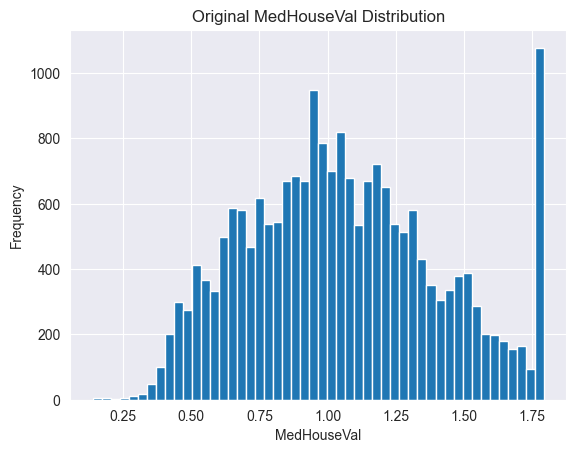

In [20]:
# CS 451/551
# Coding Practice Session 3
# Last name: Guthrie
# Email: mbguthrie1@crimson.ua.edu
# Q1
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import numpy as np
housing = fetch_california_housing()

MedHouseVal = housing.target
print(MedHouseVal)

plt.hist(MedHouseVal, bins=50)
plt.title("Original MedHouseVal Distribution")
plt.xlabel("MedHouseVal")
plt.ylabel("Frequency")
plt.show()

MedHouseVal = np.log1p(MedHouseVal)

plt.hist(MedHouseVal, bins=50)
plt.title("Original MedHouseVal Distribution")
plt.xlabel("MedHouseVal")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Q2
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
print(df.head())
df = pd.get_dummies(df, columns=['embarked'])
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
   survived  pclass     sex   age  sibsp  parch     fare  class    who  \
0         0       3    male  22.0      1      0   7.2500  Third    man   
1         1       1  female  38.0      1      0  71.2833  First  woman 

In [22]:
# Q3
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

rng = np.random.default_rng(2)
missing_indices = rng.choice(iris_df.index, size=10, replace=False)
iris_df.loc[missing_indices, 'sepal length (cm)'] = np.nan

print("Rows with missing values:\n", iris_df.loc[missing_indices])

imputer = SimpleImputer(strategy='median')
iris_df['sepal length (cm)'] = imputer.fit_transform(iris_df[['sepal length (cm)']])

print("Rows with imputed values:\n", iris_df.loc[missing_indices])

Rows with missing values:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
90                 NaN               2.6                4.4               1.2
42                 NaN               3.2                1.3               0.2
60                 NaN               2.0                3.5               1.0
15                 NaN               4.4                1.5               0.4
118                NaN               2.6                6.9               2.3
145                NaN               3.0                5.2               2.3
37                 NaN               3.6                1.4               0.1
13                 NaN               3.0                1.1               0.1
66                 NaN               3.0                4.5               1.5
49                 NaN               3.3                1.4               0.2
Rows with imputed values:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
90        

In [23]:
# Q4
from scipy.stats import zscore

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

print("Shape before outlier removal: ", df.shape)

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)

filtered_rows = (abs_z_scores < 3).all(axis=1)

df = df[filtered_rows]
print("Shape after outlier removal: ", df.shape)

Shape before outlier removal:  (20640, 8)
Shape after outlier removal:  (19794, 8)


In [24]:
# Q5
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets 

scaler = StandardScaler()

x_standardized = scaler.fit_transform(x)
df_standardized = pd.DataFrame(x_standardized, columns=x.columns)

print(df_standardized.head())

min_max_scaler = MinMaxScaler()

x_normalized = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_normalized, columns=x.columns)

print(df_normalized.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.915464  
1 -0.580068  
2 -0.580068  


In [25]:
# Q6
df = pd.read_csv('diabetes.csv')
df['Age_Bin'] = pd.cut(x=df['Age'], bins=3)
print(df['Age_Bin'].value_counts())

Age_Bin
(20.94, 41.0]    596
(41.0, 61.0]     147
(61.0, 81.0]      25
Name: count, dtype: int64


Text(0, 0.5, 'Principal Component 2')

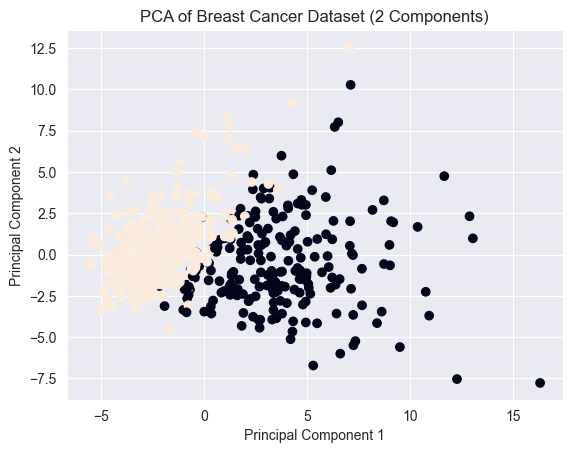

In [26]:
# Q7
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target
target_names = cancer.target_names

x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['target'] = y

plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['target'])
plt.title('PCA of Breast Cancer Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')




In [27]:
# Q8
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets 

y_flat = y.values.ravel()
model = LinearRegression()

rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(x, y_flat)

selected_features = x.columns[rfe.support_]
print(list(selected_features))

['volatile_acidity', 'chlorides', 'density', 'sulphates', 'alcohol']


In [28]:
# Q9
air_quality = fetch_ucirepo(id=360) 

x = air_quality.data.features 
y = air_quality.data.targets 

x['Timestamp'] = pd.to_datetime(x['Date'] + ' ' + x['Time'])
x['DayOfWeek'] = x['Timestamp'].dt.day_name()
x['Hour'] = x['Timestamp'].dt.hour
x['Month'] = x['Timestamp'].dt.month_name()

print(x[['Date', 'Time', 'Timestamp', 'DayOfWeek', 'Hour', 'Month']].head())

        Date      Time           Timestamp  DayOfWeek  Hour  Month
0  3/10/2004  18:00:00 2004-03-10 18:00:00  Wednesday    18  March
1  3/10/2004  19:00:00 2004-03-10 19:00:00  Wednesday    19  March
2  3/10/2004  20:00:00 2004-03-10 20:00:00  Wednesday    20  March
3  3/10/2004  21:00:00 2004-03-10 21:00:00  Wednesday    21  March
4  3/10/2004  22:00:00 2004-03-10 22:00:00  Wednesday    22  March


In [29]:
# Q10
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing()
x = housing.data
y = housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)


MSE: 0.5558915986952423
R2: 0.5757877060324523
